<생존자 예측>
- 타  겟 : survived
-

In [156]:
# 모듈 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


file = '../data/titanic.csv'
df = pd.read_csv(file)

In [157]:

df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [158]:
#df.columns

In [159]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- PassengerId : 승객 아이디
- Survived : 생존 유무
- Pclass : 객실 등급
- Name : 이름
- Sex : 성별
- Age : 나이
- Sibsp : 형제 혹은 부부의 수
- Parch : 부모 혹은 자녀의 수
- Ticket : 편명
- Fare : 지불한 요금
- cabin : 객실
- Embarked : 승선 위치

PassengerId : 각 승객의 고유 번호

Survived : 생존 여부(종속 변수)

0 = 사망
1 = 생존

Pclass : 객실 등급 - 승객의 사회적, 경제적 지위
    (1st = Upper,
    2nd = Middle, 
    3rd = Lower)

Name : 이름

Sex : 성별

Age : 나이

SibSp : 동반한 Sibling(형제자매)와 Spouse(배우자)의 수

Parch : 동반한 Parent(부모) Child(자식)의 수

Ticket : 티켓의 고유넘버

Fare : 티켓의 요금

Cabin : 객실 번호

Embarked : 승선한 항
    (C = Cherbourg,
    Q = Queenstown,
    S = Southampton)

<데이터 전처리>
1) 상관계수로 데이터 분포 확인 => 산점도 그려보기
2) 결측치/이상치/중복값 확인.

In [160]:
df['Sex'] = df['Sex'].replace({'male':0, 'female':1})
df['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [161]:
abs(df.corr(numeric_only=True))['Survived'].sort_values()

PassengerId    0.005007
SibSp          0.035322
Age            0.077221
Parch          0.081629
Fare           0.257307
Pclass         0.338481
Sex            0.543351
Survived       1.000000
Name: Survived, dtype: float64

In [162]:
# mask = df[['PassengerId', 'Ticket', 'Cabin', 'Embarked']] 필터링이 안돼서 주석처리..ㅠ
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare']]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [163]:
# 결측값 중복값

print("[결측값]", df.isna().sum(),
      "[중복값]", df.duplicated().sum(), sep='\n\n')

[결측값]

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

[중복값]

114


{'whiskers': [<matplotlib.lines.Line2D at 0x278ed997af0>,
 'caps': [<matplotlib.lines.Line2D at 0x278ed99ee20>,
 'boxes': [<matplotlib.lines.Line2D at 0x278ed997c70>,
 'medians': [<matplotlib.lines.Line2D at 0x278ed99eca0>,
 'fliers': [<matplotlib.lines.Line2D at 0x278ed99e040>,
 'means': []}

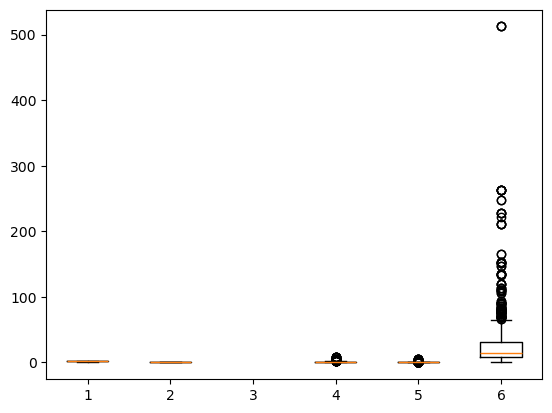

In [164]:
# 이상치 확인 => ?!
plt.boxplot(df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']])

<Axes: >

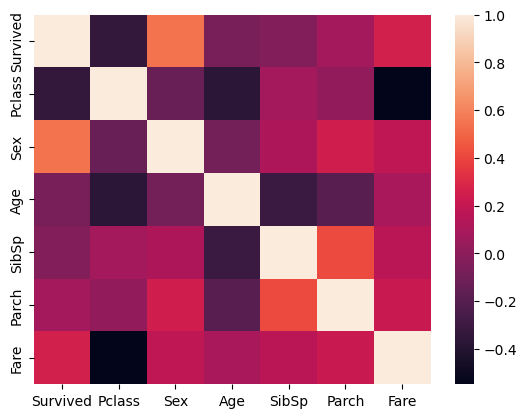

In [147]:
import seaborn as sns

sns.heatmap(df.corr())

In [148]:
from itertools import combinations

featurecol = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
targetcol = ['Survived']

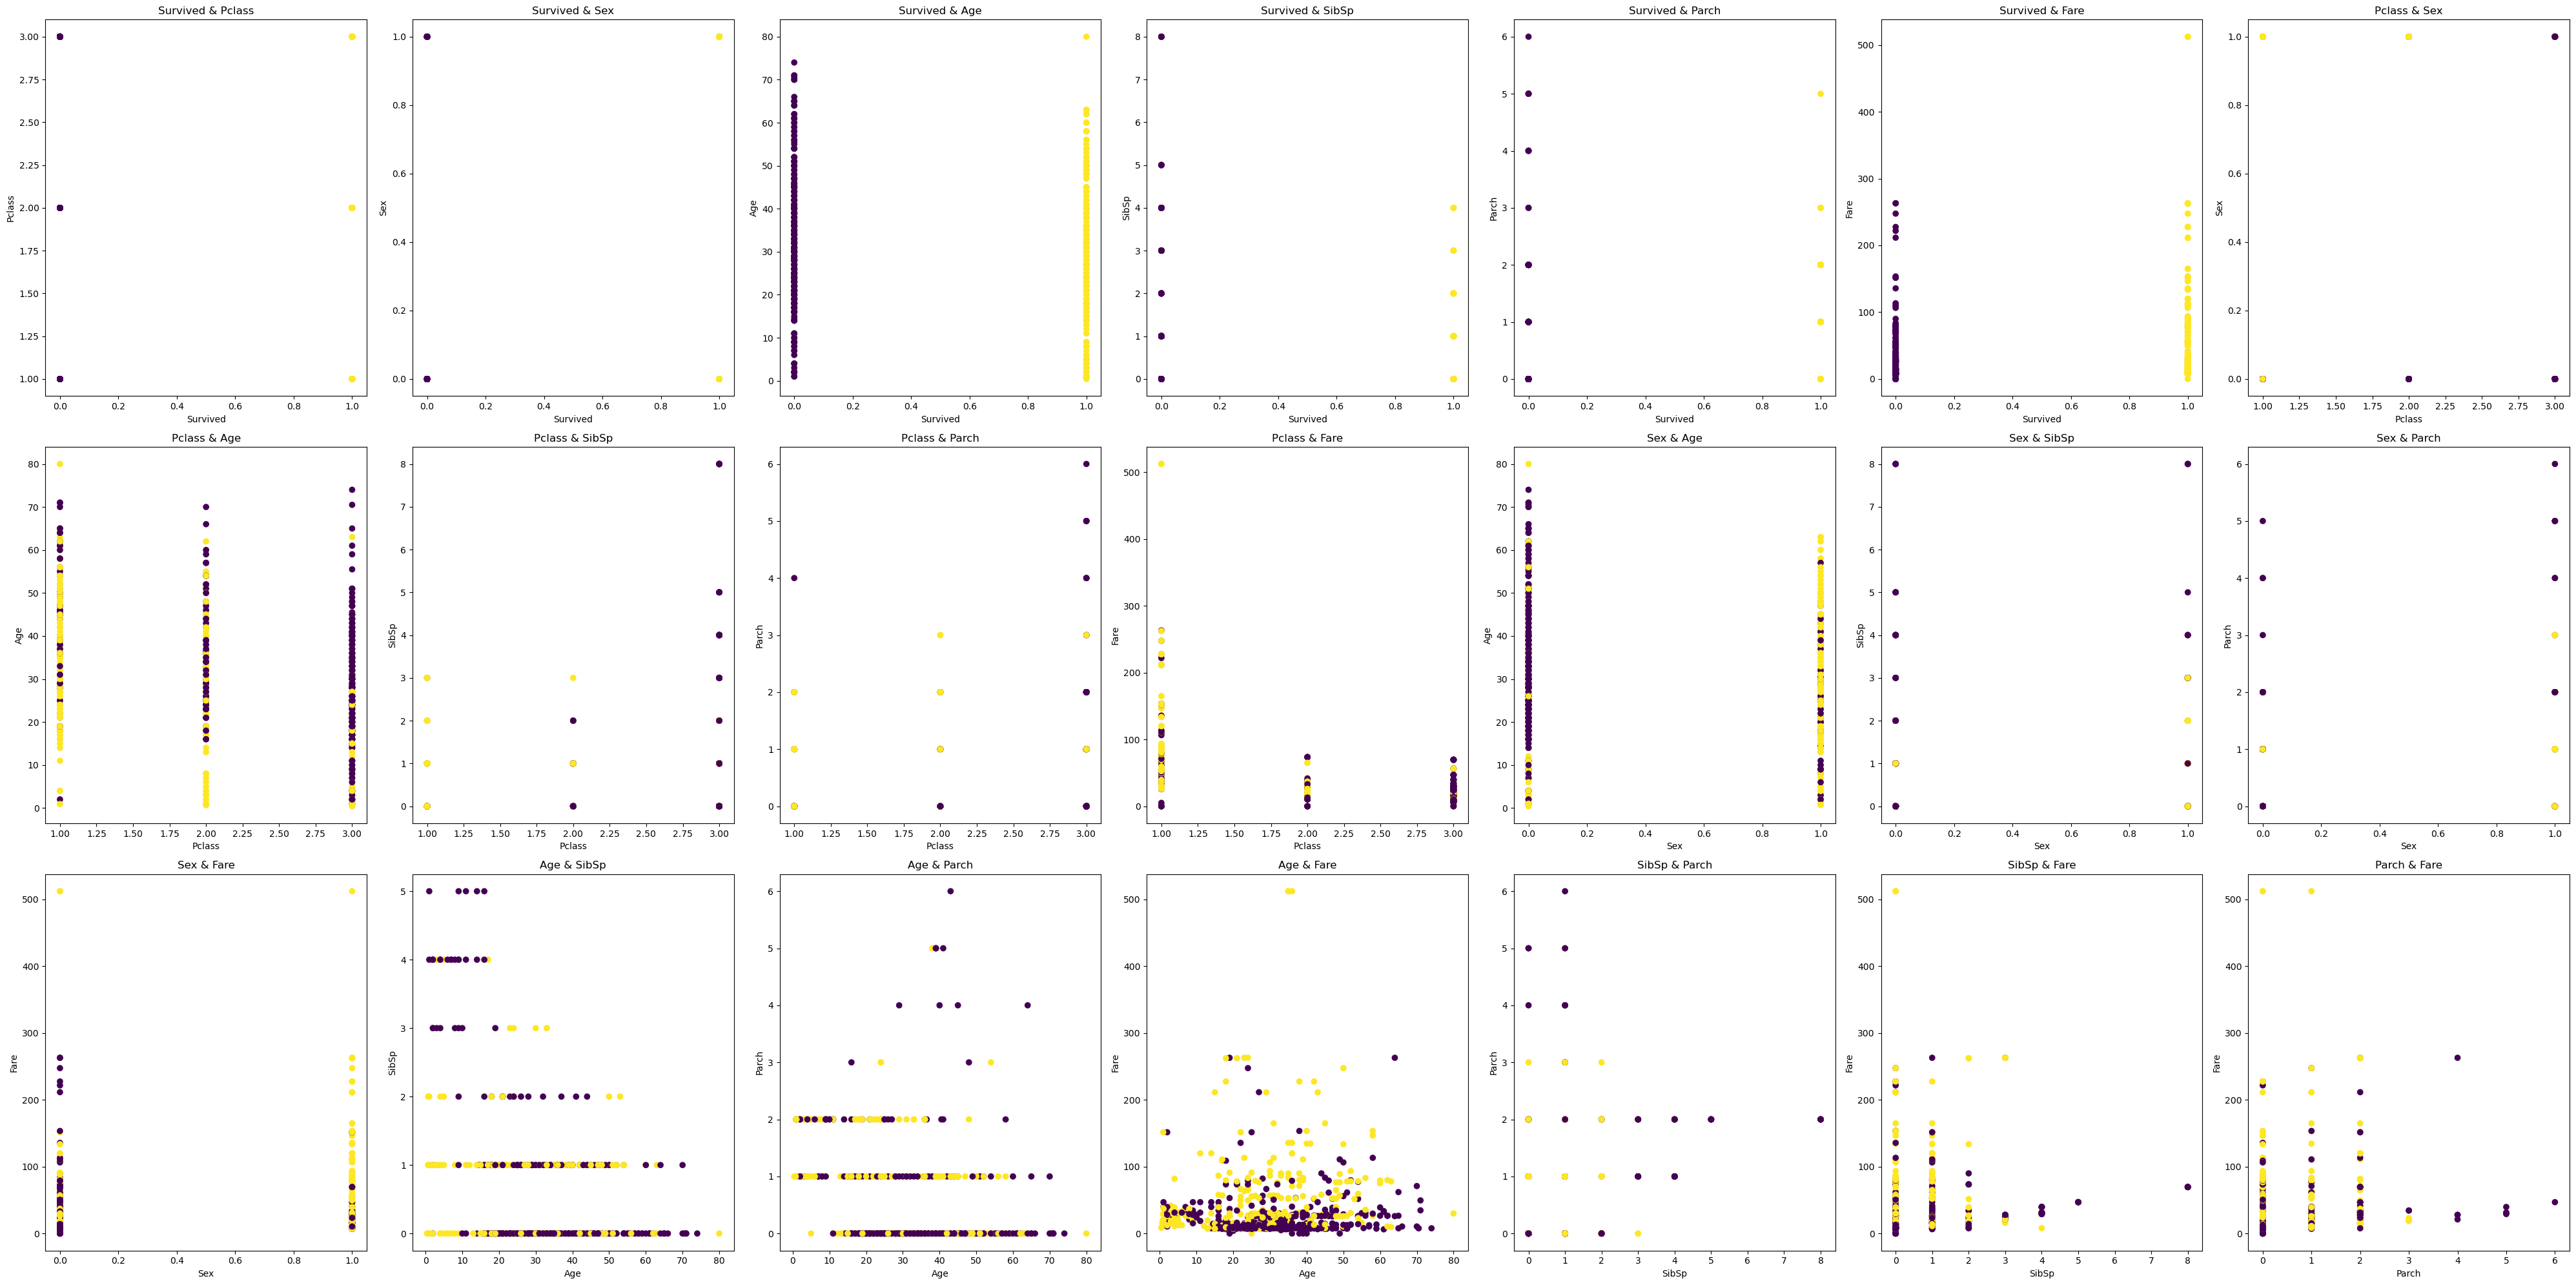

In [149]:
#print(len(list(combinations(df[df.columns], 2)))) #=> 21

n = 1
plt.figure(figsize=(40, 20))
for l, v in combinations(df[df.columns], 2) :
    plt.subplot(3, 7, n)
    plt.scatter(df[l], df[v], c = df['Survived'])
    plt.title(f'{l} & {v}')
    plt.xlabel(l)
    plt.ylabel(v)
    n += 1
plt.tight_layout()
plt.show()

In [150]:
#print(len(list(combinations(df[featurecol], 2)))) #=> 21

#print(pd.crosstab(df['Sex'], df['Age']).T)

# for l, v in combinations(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], 2) :
#     print(pd.crosstab(df[l], l[v]))

In [151]:
# 타겟 - 피처 나누기
targetSR = df['Survived']
featureDF = df[featurecol]

In [152]:
from sklearn.model_selection import train_test_split
Xtrn, Xtst, ytrn, ytst = train_test_split(featureDF, targetSR, test_size=0.2, stratify=targetSR)

In [ ]:
#from sklearn.preprocessing import PolynomialFeatures
